<a href="https://colab.research.google.com/github/jimmy-pink/colab-machinelearning-playground/blob/main/deeplearning-ai/Tensorflow-C3-NLP-RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚜️ 《C3 NLP & RNN》
[Tensorflow Embedding Projector](https://projector.tensorflow.org/)    
[Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/overview)  
[Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/)   
## 文本的情感

#### 基于单词的编码

给第一个单词一个编码  
```
I Love My Dog.
1 2    3  4
I Love My Cat.
1 2    3  5
==>
My Cat Love Me
3  5   2    6
```



### 标记化 Tokenization
在 TensorFlow NLP 中，单词或词汇通常会被转换成以下两种形式之一：  
1. 词级 (Word-level) 编码
    - 每个单词被映射为一个唯一的整数 ID。
    -	示例：{"I": 1, "Love": 2, "My": 3, "Dog": 4, "Cat": 5}
2. 子词级 (Subword-level) 编码（更推荐）
    - 句子被拆解成更小的子词单元（如 BERT 的 WordPiece、GPT 的 Byte-Pair Encoding 等）。   
    - 文本示例： "unbelievably fast"   

| 编码等级 | 编码示例 |    
|:--------|:-------|  
| 词级 | unbelievably=100, fast = 101 |  
| 子词级 | un=1, believ=2, ably=3, fast=4 |  





In [2]:
import tensorflow as tf

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
    ]

vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(sentences)
vocabulary = vectorize_layer.get_vocabulary()
print(vocabulary)
vocab = vectorize_layer.get_vocabulary(include_special_tokens=False)
print(vocab)

['', '[UNK]', np.str_('my'), np.str_('love'), np.str_('dog'), np.str_('you'), np.str_('i'), np.str_('think'), np.str_('is'), np.str_('do'), np.str_('cat'), np.str_('amazing')]
[np.str_('my'), np.str_('love'), np.str_('dog'), np.str_('you'), np.str_('i'), np.str_('think'), np.str_('is'), np.str_('do'), np.str_('cat'), np.str_('amazing')]


In [ ]:
# 将句子 矢量化 (将word集合 转为int 序列)
test_new_seq = vectorize_layer("I LOVE My Bird")
print(test_new_seq) ## 注意unknown word--bird，在seq将使用句子中没有出现过的token替换

# 矢量化数组
test_arr_seq = vectorize_layer(['I love my son', 'My Son Love Me'])
print(test_arr_seq)

# 矢量化为map
sentence_dataset = tf.data.Dataset.from_tensor_slices(sentences)
sequences = sentence_dataset.map(vectorize_layer)
for sentence, sequence in zip(sentences, sequences):
  print(f'{sentence} ---> {sequence}')

In [ ]:
# 将句子对齐 (默认右对齐，左边补0)
sequences_pre = tf.keras.utils.pad_sequences(sequences=sequences)
print(sequences_pre)

# 示例右边补0，截断仅保留5位
sequences_post = tf.keras.utils.pad_sequences(sequences=sequences, padding='post', maxlen=5, truncating='post')
print(sequences_post)

## 词语嵌入 Word Embedding  

Word Embedding 是一种将单词转换为 稠密向量 (Dense
  Vector) 的方法。 它的目的是将语言数据转化为计算机可理解的数值形式， 同时保留单词的语义和语境。  

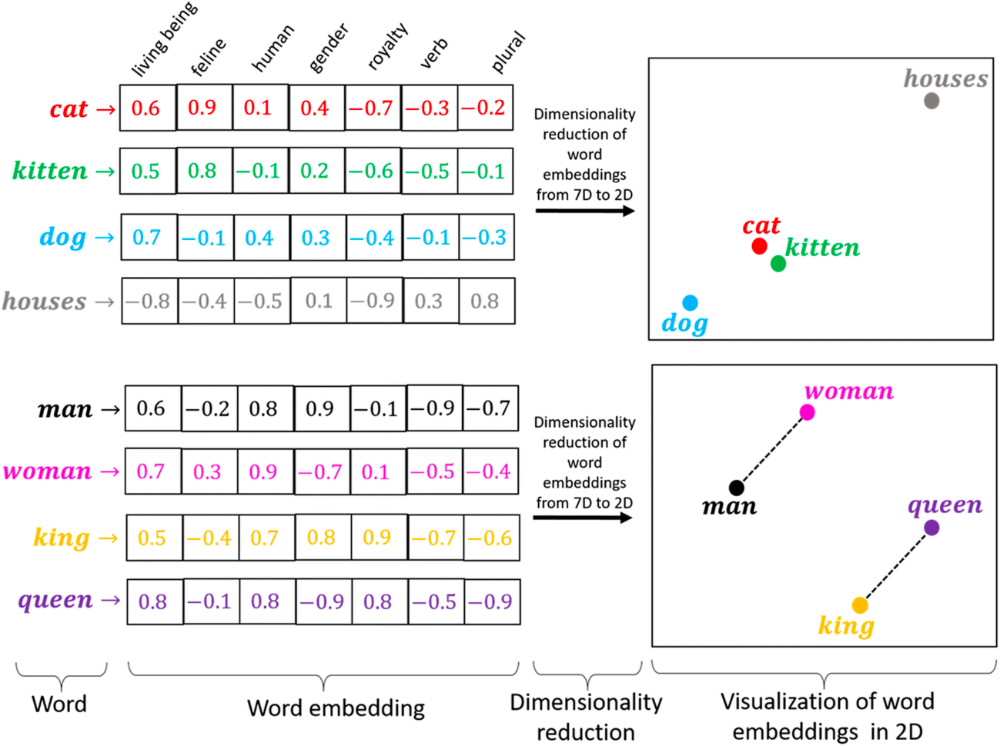

上图是word/token的8维的词向量， 每个数值表示 一个**单词**（word） 在 **特定维度**（dimension） 上的 **嵌入值**（embedding value）

In [ ]:
import tensorflow as tf
import numpy as np

VOCAB_SIZE = 10      # 词汇表大小（假设有 10 个惟一单词）
EMBEDDING_DIM = 3    # 每个单词映射到 3 维向量

embedding_layer = tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)

# 输入一个批次的句子（批量大小=2，序列长度=4）
input_data = np.array([
    [1, 2, 3, 4],  # "I Love My Dog"
    [3, 5, 2, 6]   # "My Cat Love Me"
])

# 通过嵌入层
output = embedding_layer(input_data)

print("输入 shape:", input_data.shape)    # (2, 4)
print("输出 shape:", output.shape)       # (2, 4, 3) -> 每个单词变成 3 维向量
print("输出数据:", output.numpy())       # 随机初始化的嵌入向量

**GlobalAveragePooling1D**  
全局平均池化层  
作用： **压缩时间步维度**，将一个**变长序列**（如文本）转换成**定长向量**，适用于分类任务。  
计算原理:
$$output = \frac{1}{T}\sum_{t=1}^T x_{t,f}$$
-	T = 4（时间步数，即单词数）
- f（每个单词的嵌入维度）

In [ ]:
import tensorflow as tf
import numpy as np

# Initialize a 全局平均池化层 (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array([[[-0.0083224, 0.00411193, -0.03849589],  # I
                          [-0.04206339, 0.03271176, -0.01535357], # Love
                          [-0.01396907, -0.02724629, 0.03780114], # My
                          [-0.01961154, 0.03724109, 0.04713741]],# Dog

                         [[-0.01396907, -0.02724629, 0.03780114], # My
                          [0.04473491, 0.00957827, -0.02184257],  # Cat
                          [-0.04206339, 0.03271176, -0.01535357], # Love
                          [0.00545299, -0.01805108, -0.00969309]]]) # Me
# sample_array.shape.batch_size =2, 代表有2个 样本
# sample_array.shape.timesteps = 4, 代表三个时间步的数据
# sample_array.shape.features = 3, 代表特征有两个
print(f'shape of sample_array = {sample_array.shape}')
# print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

**加载sarcasm.json 训练模型**

In [ ]:
# 核心代码
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import requests

# 加载新闻标题json数据文档
# .json内容示例：[{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},...更多]
url = "https://raw.githubusercontent.com/ashwaniYDV/sarcasm-detection-tensorflow/main/sarcasm.json"
response = requests.get(url)
datastore = response.json()

sentences = [] #标题集合
labels = [] #标签 0非讽刺的，1讽刺的
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
print("sentences length ", len(sentences))

# Number of examples to use for training
TRAINING_SIZE = 20000
# Vocabulary size of the tokenizer
VOCAB_SIZE = 10000
# Maximum length of the padded sequences
MAX_LENGTH = 32
# Output dimensions of the Embedding layer
EMBEDDING_DIM = 16

# Split the sentences: 前2万训练 后6.7千测试
train_sentences = sentences[0:TRAINING_SIZE]
test_sentences = sentences[TRAINING_SIZE:]
# Split the labels
train_labels = labels[0:TRAINING_SIZE]
test_labels = labels[TRAINING_SIZE:]

## max_tokens 最大惟一单词数量， 超出会优先取词频高的
## output_sequence_length 当vectorize_layer(sentence)方法调用时， 如果长度超出max_length  会截断只有max_len个单词
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)
vectorize_layer.adapt(sentences)

# 矢量化语句集
train_sequences = vectorize_layer(train_sentences)
test_sequences = vectorize_layer(test_sentences)

# 将数据包装成 TensorFlow 数据集
train_dataset_vectorized = tf.data.Dataset.from_tensor_slices((train_sequences,train_labels))
test_dataset_vectorized = tf.data.Dataset.from_tensor_slices((test_sequences,test_labels))

for example,label in train_dataset_vectorized.take(1):
  print(example)
  print(f"Lable: {label.numpy()}")

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Optimize the datasets for training
train_dataset_final = (train_dataset_vectorized.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE))
test_dataset_final = (test_dataset_vectorized.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE))

model = tf.kears.Sequential([
    tf.keras.Input(shape = (MAX_LENGTH, )),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimization="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(train_dataset_final, validation_data=test_dataset_final, epochs=10, verbose=2)


### 子词Tokenization
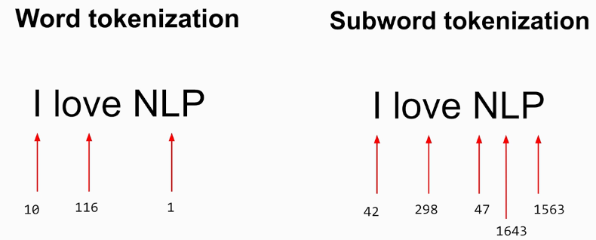

**测试WordPieceTokenizer**

In [ ]:
import keras_nlp
import tensorflow as tf

train_sentences = [
    "You can compile your model as before and print out the summary with this code.",
    "This comes from China",
    "You need to maser this basic skill.",
    "There's a good chance that we're overfitting.",
    "TensorFlow makes it easy to create ML models that can run in any environment. ",
]
dataset = tf.data.Dataset.from_tensor_slices(train_sentences)
# 1. **手动创建词汇表**，使用 `keras_nlp.tokenizers.compute_word_piece_vocabulary`
vocab_list = keras_nlp.tokenizers.compute_word_piece_vocabulary(
    dataset,
    vocabulary_size=8000,  # 限制词汇表大小
    reserved_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]  # 预留特殊标记
)

# 2. **创建 WordPiece 分词器**
subword_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab_list,
    lowercase=True  # 是否对文本转换为小写
)

# 3. **测试分词**
sample_string = "TensorFlow, from basic to mastery"
tokenized_string = subword_tokenizer.tokenize(sample_string)
print("Tokenized string:", tokenized_string)
tokens_as_words = [vocab_list[token_id] for token_id in tokenized_string]
print("Subwords corresponding to tokens:", tokens_as_words)

# 4. **反向解码**
original_string = subword_tokenizer.detokenize(tokenized_string)
print("Original string:", original_string)

**加入子词Tokenization 训练模型**

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras_nlp

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True, data_dir='./data',download=True)

train_reviews = imdb['train'].map(lambda review, label: review)
train_labels = imdb['train'].map(lambda review, label: label)

test_reviews = imdb['test'].map(lambda review, label: review)
test_labels = imdb['test'].map(lambda review, label: label)

VOCAB_SIZE = 10000
MAX_LENGTH = 120
PADDING_TYPE = 'pre'
TRUNC_TYPE = 'post'

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE
)
vectorize_layer.adapt(train_reviews)

def padding_func(sequences):

  # Put all elements in a single ragged batch
  sequences = sequences.ragged_batch(batch_size=sequences.cardinality())
  # Output a tensor from the single batch
  sequences = sequences.get_single_element()
  # Pad the sequences
  padded_sequences = tf.keras.utils.pad_sequences(sequences.numpy(),
                                                  maxlen=MAX_LENGTH,
                                                  truncating=TRUNC_TYPE,
                                                  padding=PADDING_TYPE
                                                 )

  return tf.data.Dataset.from_tensor_slices(padded_sequences)

vocab_list = keras_nlp.tokenizers.compute_word_piece_vocabulary(
    train_reviews,
    vocabulary_size=8000,
    reserved_tokens=["[PAD]", "[UNK]"]
)
subword_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab_list
)

# 查看第1个元素的子词分词结果
sample_review = train_reviews.take(1).get_single_element()
tokenized_string = subword_tokenizer.tokenize(sample_review)
print ('Tokenized string is {}'.format(tokenized_string))

SHUFFLE_BUFFER_SIZE = 10000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Generate integer sequences using the subword tokenizer
train_sequences_subword = train_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)
test_sequences_subword = test_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)

# Combine the integer sequence and labels
train_dataset_vectorized = tf.data.Dataset.zip(train_sequences_subword,train_labels)
test_dataset_vectorized = tf.data.Dataset.zip(test_sequences_subword,test_labels)

# Optimize the datasets for training
train_dataset_final = (train_dataset_vectorized
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .cache()
                       .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                       .batch(BATCH_SIZE)
                       )

test_dataset_final = (test_dataset_vectorized
                      .cache()
                      .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                      .batch(BATCH_SIZE)
                      )

model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(subword_tokenizer.vocabulary_size(), EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# .compile, .fit省略


## LSTM

- Example：
    - I live in China, so at school they made me learn how to speak <..>
    - I live in **China**, so at school they made me learn how to speak **Chinese**

- 序列（Sequence） 非常重要，因为单词的出现顺序对于句子的语义理解至关重要。
- LSTM（长短期记忆网络）在处理句子中修饰关系不相邻的词语时，能够通过其 门控机制 和 记忆单元 来捕捉和保持句子中长期的依赖关系。
- LSTM通过将重要的上下文信息保存在 细胞状态（cell state） 中，并在处理后续词汇时使用这些信息，帮助理解不相邻但相关的词语之间的语义联系。
- RNN（循环神经网络）通过将序列中的信息从一个时间步（cell）传递到下一个时间步，从而能够捕捉序列的上下文信息，进而理解句子或序列的整体意义。

- Bidirectional 层允许LSTM在句子中向前和向后查找。(通常RNN是单向的)

- return_sequences=True：这是堆叠 LSTM 时非常关键的参数。为True表示每个时间步都会返回一个隐藏状态（即输出序列）。这些输出会作为下一个LSTM层的输入。

### GRUs, Conv1D与LSTM对比

- GRU
```python
EMBEDDING_DIM = 16
GRU_DIM = 32
DENSE_DIM = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(GRU_DIM)),
    tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

- Conv1D
```python
EMBEDDING_DIM = 16
FILTERS = 128
KERNEL_SIZE = 5
DENSE_DIM = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    tf.keras.layers.Conv1D(FILTERS, KERNEL_SIZE, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

| **特性**             | **LSTM**                         | **GRU**                         | **Conv1D**                        |
|----------------------|----------------------------------|----------------------------------|-----------------------------------|
| **计算复杂度**       | 较高                             | 较低                             | 较低                              |
| **训练效率**         | 慢                               | 快                               | 非常快                            |
| **长期依赖捕捉**     | 强                               | 较强                             | 弱                                |
| **参数数量**         | 多                               | 少                               | 少                                |
| **局部特征捕捉**     | 较弱                             | 较弱                             | 强                                |
| **适用任务**         | 长文本、机器翻译、生成任务       | 中等长度序列、语音识别、情感分析 | 文本分类、情感分析、局部特征提取 |
| **优点**             | - 能捕捉长距离的依赖<br>- 适用于复杂任务 | - 计算效率较高<br>- 较少的参数，减少过拟合风险 | - 模型简单，计算效率高<br>- 擅长局部特征提取 |
| **缺点**             | - 参数较多，容易过拟合<br>- 训练时间较长 | - 对长期依赖的捕捉能力较差<br>- 不适合处理非常长的序列 | - 不适合捕捉长距离依赖<br>- 不能处理复杂的上下文关系 |

In [ ]:
# 下载分词词库文件到本地
!wget https://raw.githubusercontent.com/https-deeplearning-ai/tensorflow-1-public/main/C3/W2/ungraded_labs/imdb_vocab_subwords.txt

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import keras_nlp
import numpy as np

imdb = tfds.load("imdb_reviews", as_supervised=True, data_dir="../data/", download=True)

# Extract the train reviews and labels
train_reviews = imdb['train'].map(lambda review, label: review)
train_labels = imdb['train'].map(lambda review, label: label)

# Extract the test reviews and labels
test_reviews = imdb['test'].map(lambda review, label: review)
test_labels = imdb['test'].map(lambda review, label: label)

subword_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary='./imdb_vocab_subwords.txt'
)

SHUFFLE_BUFFER_SIZE = 10000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 256
PADDING_TYPE = 'pre'
TRUNC_TYPE = 'post'


def padding_func(sequences):
  '''Generates padded sequences from a tf.data.Dataset'''
  # Put all elements in a single ragged batch
  sequences = sequences.ragged_batch(batch_size=sequences.cardinality())
  # Output a tensor from the single batch
  sequences = sequences.get_single_element()
  # Pad the sequences
  padded_sequences = tf.keras.utils.pad_sequences(sequences.numpy(),
                                                  truncating=TRUNC_TYPE,
                                                  padding=PADDING_TYPE
                                                 )
  # Convert back to a tf.data.Dataset
  padded_sequences = tf.data.Dataset.from_tensor_slices(padded_sequences)
  return padded_sequences


train_sequences_subword = train_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)
test_sequences_subword = test_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)

# Combine the integer sequence and labels
train_dataset_vectorized = tf.data.Dataset.zip(train_sequences_subword,train_labels)
test_dataset_vectorized = tf.data.Dataset.zip(test_sequences_subword,test_labels)

# Optimize the datasets for training
train_dataset_final = (train_dataset_vectorized
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .cache()
                       .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                       .batch(BATCH_SIZE)
                       )

test_dataset_final = (test_dataset_vectorized
                      .cache()
                      .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                      .batch(BATCH_SIZE)
                      )


# Parameters
BATCH_SIZE = 1
TIMESTEPS = 20
FEATURES = 16
LSTM_DIM = 8

print(f'batch_size: {BATCH_SIZE}')
print(f'timesteps (sequence length): {TIMESTEPS}')
print(f'features (embedding size): {FEATURES}')
print(f'lstm output units: {LSTM_DIM}')

# Define array input with random values
random_input = np.random.rand(BATCH_SIZE,TIMESTEPS,FEATURES)
print(f'shape of input array: {random_input.shape}')

# Define LSTM that returns a single output
lstm = tf.keras.layers.LSTM(LSTM_DIM)
result = lstm(random_input)
print(f'shape of lstm output(return_sequences=False): {result.shape}')

# Define LSTM that returns a sequence
lstm_rs = tf.keras.layers.LSTM(LSTM_DIM, return_sequences=True)
result = lstm_rs(random_input)
print(f'shape of lstm output(return_sequences=True): {result.shape}')

# Model parameters
EMBEDDING_DIM = 64
LSTM1_DIM = 32
LSTM2_DIM = 16
DENSE_DIM = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(None,)),
    tf.keras.layers.Embedding(subword_tokenizer.vocabulary_size(), EMBEDDING_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM1_DIM, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM2_DIM)),
    tf.keras.layers.Dense(DENSE_DIM, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset_final, epochs=NUM_EPOCHS, validation_data=test_dataset_final)
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
  ax[0].set_title('Training and validation accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
  ax[1].set_title('Training and validation loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

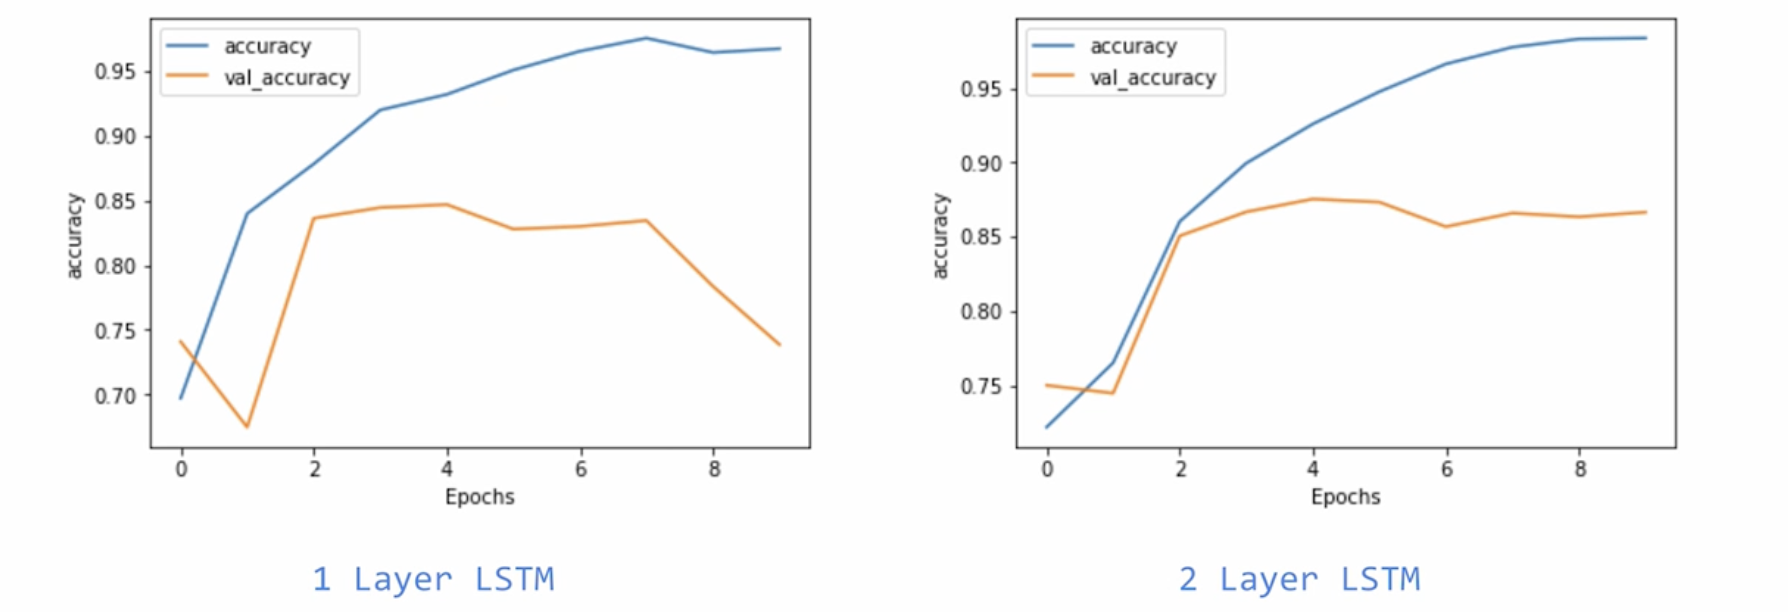

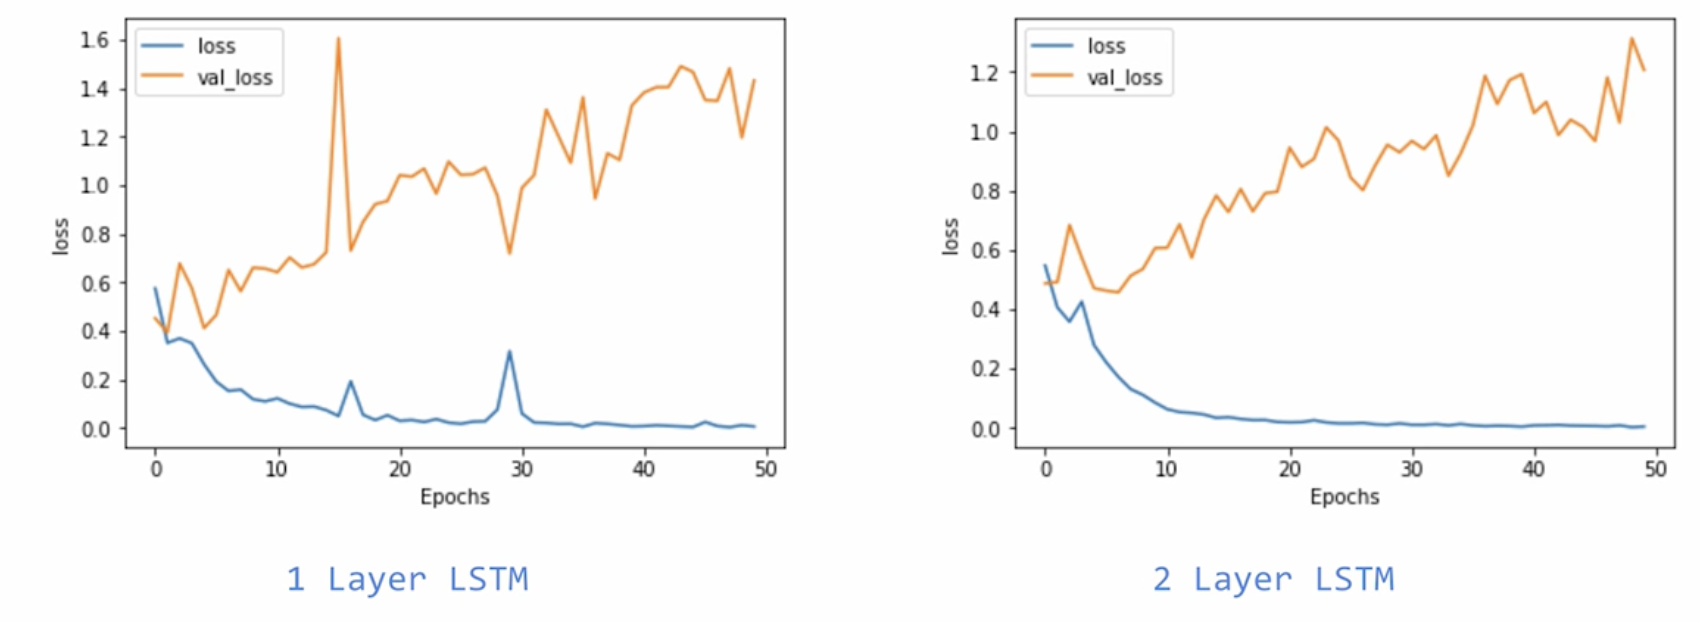